In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ps = pd.read_csv("googleplaystore_v2.csv")

In [3]:
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
ps.shape

(10841, 13)

In [5]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [6]:
ps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# "~" this symbol means compliment 
# in the below line of code I'm creating a new df called gps which does not have any null ratings

gps = ps[~ps.Rating.isnull()]

In [8]:
gps.shape

(9367, 13)

In [9]:
gps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [10]:
gps[gps['Android Ver'].isnull()]
# Here the record with index 10472 seems to have incorrect values so the best option is to drop the record

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
gps = gps[~(gps['Android Ver'].isnull())]

In [12]:
# Identifying the record with incorrect value
gps[(gps['Android Ver'].isnull() & (gps.Category == '1.9'))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [13]:
gps = gps[~(gps['Android Ver'].isnull() & (gps.Category == '1.9'))]

In [14]:
# Verifying the changes
gps[gps['Android Ver'].isnull()]
# We now have only two records for missing Android Ver

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [15]:
gps[gps['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [16]:
gps['Android Ver'].mode()

# A practice is to replace the nulls with the mode value

0    4.1 and up
Name: Android Ver, dtype: object

In [17]:
# Extracting the mode value alone
gps['Android Ver'].mode()[0]

'4.1 and up'

In [18]:
gps['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    194
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [19]:
gps['Android Ver'] = gps['Android Ver'].fillna(gps['Android Ver'].mode()[0])

In [20]:
# No NULL values in Android Version
gps[gps['Android Ver'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [21]:
gps['Current Ver'] = gps['Current Ver'].fillna(gps['Current Ver'].mode()[0])

In [22]:
# or we can check this way too
gps['Current Ver'].isnull().sum()

0

In [23]:
gps['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    194
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [24]:
gps[gps['Android Ver'] == '4.1 and up'].Price.mean()

TypeError: Could not convert 00000000000000000000000000000000000000000000000000000000000000000000000000000$3.99000000$3.9900000000000000000000000000000000000000$3.9900000000000000000000000000000000000000000000000000000$5.990000000000000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$9.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99$2.990000000000000000000000000000$4.99$2.99$4.99000000000$5.49$10.00$3.99$2.99$2.99$0.99$7.49$2.99$1.99$7.99$19.990000000000000000000000$10.0000$5.49000$39.990$19.99000000000000000000000000000000000000000000000000000000000000000000000000000000000$5.99$5.9900000$5.990000000000000000000000$29.990000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000$0.99000000000000000000000000000000000000000$0.990000000000$5.9900000000000000$400.00000$2.990000000000$0.99000$2.49$1.99$0.990000$0.9900$0.99$0.990000$4.7700$4.990000$2.4900000000000000000000000$1.9900000000$1.990$1.990$1.990$0.9900$0.99$3.990000000000000000000000000$1.9900000$9.9900$1.9900$3.990$0.99000$2.9900$19.9900000$0.990000000000000000000$0.99$0.99$0.990000000000000000$399.990$2.49$399.99000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$8.490000000$1.750000000000000000000000000000000$2.990000$4.9900000000$4.9900000000000000000000000000000000000$0.990$0.99000$2.99000000000$0.990000000$4.4900000000000000000000000000000000000000000000000000000000000000$3.99000000000000000000000$7.990000$4.99000000000000000000000$2.99$0.9900000000000000$0.9900000000000000000000$2.99$3.99000000$4.990000000000$0.99000000000000000000000000000000000000000000000000000000000$0.990000$4.9900$4.9900000000000000$4.990000000000000000000000$2.99000000000000$2.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$2.99000000000000$3.280000000$2.990000000000000000000000000000$0.99000000000$1.490000000000000000000$0.99000000000000000$12.990000000000000000000000000000000000000000$3.990000000000000$4.4900000$6.9900000000000000000$1.9900000000000000000000000000000000000000000000000$5.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$8.990000000000000000000000000 to numeric

In [ ]:
gps.dtypes

In [25]:
gps['Price'].value_counts()

0          8718
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [26]:
# gps['Price'] = pd.to_numeric(gps['Price'], errors='coerce') Here coerce will replace all the errors with NaN or 0

gps['Price'] = gps['Price'].apply(lambda x: 0 if x == "0" else float(x[1:]))

In [27]:
gps['Price'].mean()

0.9609739427595044

In [28]:
gps["Reviews"] = gps["Reviews"].astype("int32")
gps["Reviews"].dtype

dtype('int32')

In [29]:
gps.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9364, dtype: object

In [30]:
# to clean this up we need to remove the commas and plus symbols
gps['Installs'] = gps['Installs'].str.replace('+', '')

/var/folders/h1/h1d_bb7n6pj5rdb4b14hzwk80000gq/T/ipykernel_49052/2146743141.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gps['Installs'] = gps['Installs'].str.replace('+', '')


In [31]:
gps['Installs'] = gps['Installs'].str.replace(',', '')

In [32]:
gps['Installs'] = gps['Installs'].astype("int32")

In [33]:
gps['Installs'].dtypes

dtype('int32')

In [34]:
gps['Installs'].describe()

count    9.364000e+03
mean     1.790127e+07
std      9.124759e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

Sanity Checks

Average rating between  1 - 5

In [35]:
gps['Rating'].describe()

count    9364.000000
mean        4.191702
std         0.515260
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Reviews > Installs is an alarming situation. Lets check for that

In [36]:
gps[gps['Reviews'] > gps['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [37]:
# We have some cases where this is true. So it is best to drop these values.
gps = gps[~(gps['Reviews'] > gps['Installs'])]

For free apps the price should be 0

In [38]:
gps[(gps['Type'] == 'Free') & (gps['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [39]:
gps['Price'].describe()

count    9357.000000
mean        0.961162
std        15.824165
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [40]:
#IQR calculation
a=gps['Price'].quantile(0.25)
b=gps['Price'].quantile(0.75)
b-a

0.0

{'whiskers': [<matplotlib.lines.Line2D at 0x146fa9b40>,
 'caps': [<matplotlib.lines.Line2D at 0x146faa080>,
 'boxes': [<matplotlib.lines.Line2D at 0x146fa98a0>],
 'medians': [<matplotlib.lines.Line2D at 0x146faa5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x146faa860>],
 'means': []}

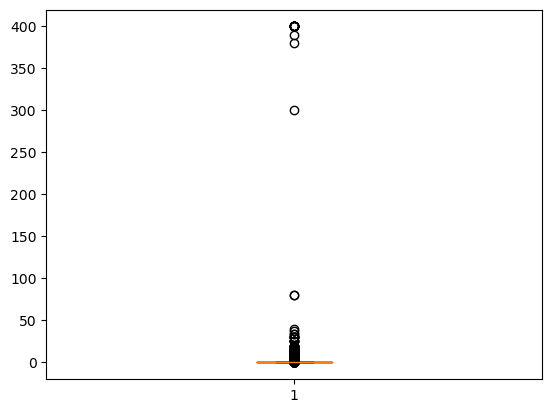

In [41]:
plt.boxplot(gps['Price'])
# We understand that the outliers needs to be removed. Here prices above 250 dollars are extreme outliers

In [42]:
gps[gps['Price'] > 250]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [43]:
# Here I'm rich seems to be like some kind of spam data which should be removed
gps = gps[~(gps['Price'] > 250)]

{'whiskers': [<matplotlib.lines.Line2D at 0x14700cf70>,
 'caps': [<matplotlib.lines.Line2D at 0x14700d4b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14700ccd0>],
 'medians': [<matplotlib.lines.Line2D at 0x14700d9c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14700dc60>],
 'means': []}

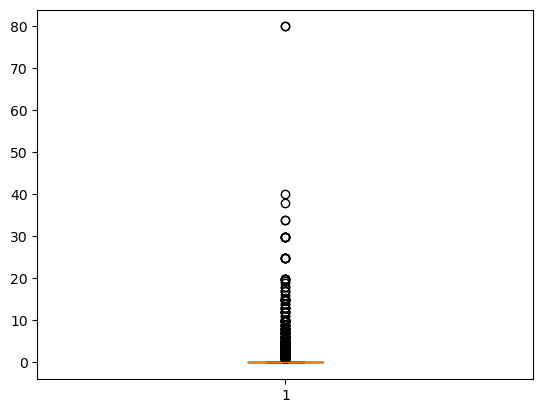

In [44]:
plt.boxplot(gps['Price'])

In [45]:
# Still the range of outliers is very high.
# Restricting the price values of less than 30
gps = gps[~(gps['Price'] > 30)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1470c1990>,
 'caps': [<matplotlib.lines.Line2D at 0x1470c1ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x146edb4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1470c2410>],
 'fliers': [<matplotlib.lines.Line2D at 0x1470c26b0>],
 'means': []}

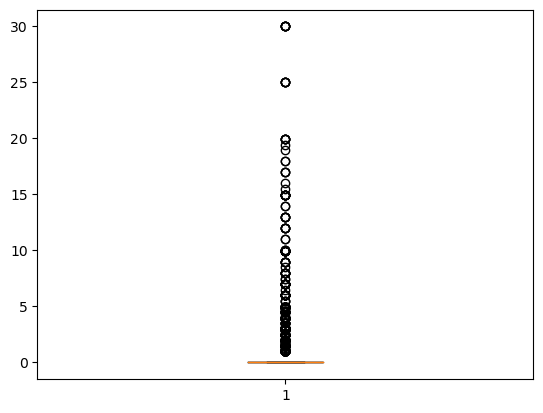

In [46]:
plt.boxplot(gps['Price'])

Reviews - How are they distributed?

(array([9.21e+03, 8.10e+01, 1.90e+01, 9.00e+00, 0.00e+00, 5.00e+00,
        0.00e+00, 3.00e+00, 7.00e+00, 2.00e+00]),
 array([1.00000000e+00, 7.81583150e+06, 1.56316620e+07, 2.34474925e+07,
        3.12633230e+07, 3.90791535e+07, 4.68949840e+07, 5.47108145e+07,
        6.25266450e+07, 7.03424755e+07, 7.81583060e+07]),
 <BarContainer object of 10 artists>)

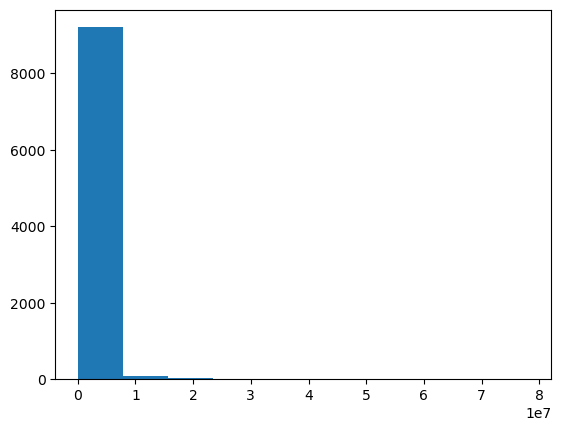

In [47]:
plt.hist(gps['Reviews'])

In [48]:
gps['Reviews'].value_counts()

2         81
3         78
5         74
4         73
1         67
          ..
342912     1
4272       1
5517       1
4057       1
398307     1
Name: Reviews, Length: 5988, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1471b7d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1471ec1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1471b7a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1471ec730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1471ec9d0>],
 'means': []}

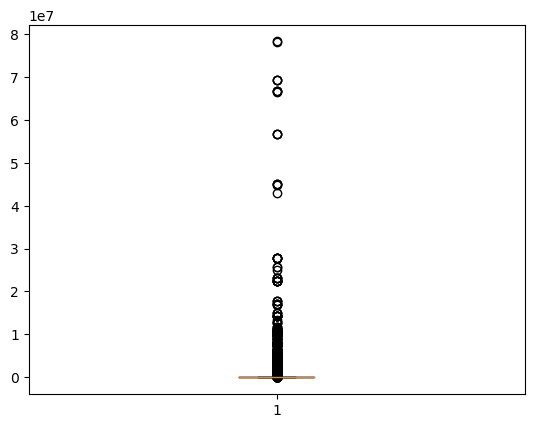

In [49]:
plt.boxplot(gps['Reviews'])

In [50]:
gps[gps['Reviews'] > 1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [51]:
# These are apps which are capturing the market already
very_big_apps = gps[gps['Reviews'] > 1000000]

In [52]:
gps = gps[~(gps['Reviews'] > 1000000)]

(array([7166.,  521.,  314.,  169.,  127.,  114.,   69.,   49.,   55.,
          48.]),
 array([1.000000e+00, 9.950110e+04, 1.990012e+05, 2.985013e+05,
        3.980014e+05, 4.975015e+05, 5.970016e+05, 6.965017e+05,
        7.960018e+05, 8.955019e+05, 9.950020e+05]),
 <BarContainer object of 10 artists>)

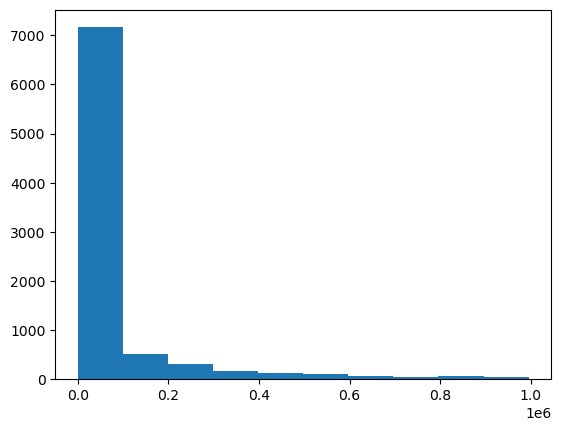

In [53]:
plt.hist(gps['Reviews'])

In [58]:
gps['Installs'].quantile(0.75) - gps['Installs'].quantile(0.25)

990000.0

In [66]:
gps = gps[gps['Installs'] <= 100000000]
gps.shape

(8622, 13)

(array([3217., 1354., 2224.,  564.,  426.,  271.,  177.,  126.,  106.,
         157.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

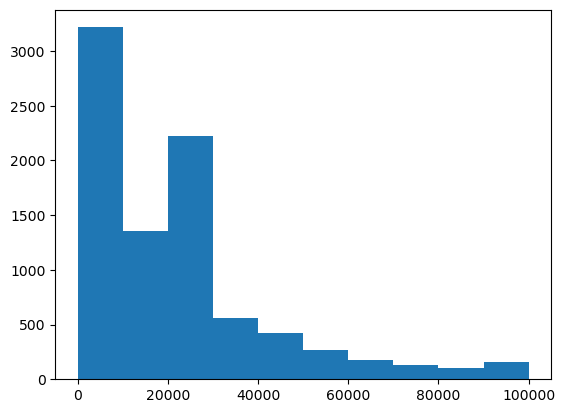

In [67]:
plt.hist(gps['Size'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1473a6ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1473a7430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1473a50c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1473a7970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1473a7c10>],
 'means': []}

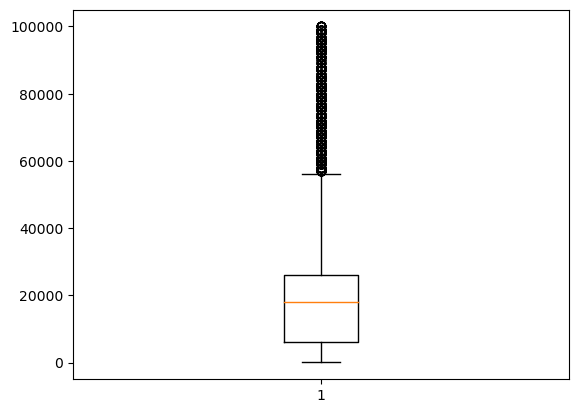

In [68]:
plt.boxplot(gps['Size'])